In [1]:
import os
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# 1er entrainement, nos données, avec gyro

In [2]:
# Function to extract features from JSON data
def extract_features(data):
    gyro = np.array([entry['gyro'] for entry in data])
    accel = np.array([entry['accel'] for entry in data])
    
    # Simple feature extraction (mean, std, min, max for gyro and accel)
    features = []
    for sensor_data in [gyro, accel]:
        features.append(np.mean(sensor_data, axis=0))
        features.append(np.std(sensor_data, axis=0))
        features.append(np.min(sensor_data, axis=0))
        features.append(np.max(sensor_data, axis=0))
    
    return np.concatenate(features)

# Load and process the dataset
def load_data(folder):
    X = []
    y = []
    
    for filename in os.listdir(folder):
        if filename.endswith('.json'):
            filepath = os.path.join(folder, filename)
            with open(filepath, 'r') as f:
                json_data = json.load(f)
                features = extract_features(json_data['data'])
                X.append(features)
                y.append(1 if json_data['iscrash'] else 0)
    
    return np.array(X), np.array(y)

# Path to the folder containing the JSON files
folder_path = './dataNous'

# Load data
X, y = load_data(folder_path)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize/scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:
X[0]
# forme [moyenne de l'acc en x, moyenne de l'acc en y, moyenne de l'acc en z, std de l'acc en x, std de l'acc en y, std de l'acc en z, min de l'acc en x, min de l'acc en y, min de l'acc en z, max de l'acc en x, max de l'acc en y, max de l'acc en z, moyenne du gyro en x, moyenne du gyro en y, moyenne du gyro en z, std du gyro en x, std du gyro en y, std du gyro en z, min du gyro en x, min du gyro en y, min du gyro en z, max du gyro en x, max du gyro en y, max du gyro en z]

array([-1.44794750e-03,  8.17971408e-03,  6.74289286e-03,  2.71405124e-01,
        1.25910566e+00,  1.35027939e-01, -1.06636488e+00, -2.69467354e+00,
       -8.80851686e-01,  1.53725088e+00,  2.96209955e+00,  7.38717020e-01,
       -1.60081761e-03,  6.10768622e-02,  3.84228883e-01,  1.40835161e+00,
        6.31657733e-01,  8.47584917e-01, -4.55428076e+00, -2.62305665e+00,
       -1.19149685e+00,  3.99840474e+00,  3.82308364e+00,  3.07907462e+00])

In [4]:
# Train a classifier (Random Forest in this case)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

print("RandomForestClassifier")
# Evaluate the model
print(classification_report(y_test, y_pred))

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.92      0.97      0.94        34

    accuracy                           0.93        54
   macro avg       0.93      0.91      0.92        54
weighted avg       0.93      0.93      0.93        54



In [5]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Classification")
print(classification_report(y_test, y_pred_svm))


SVM Classification
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        20
           1       0.85      1.00      0.92        34

    accuracy                           0.89        54
   macro avg       0.93      0.85      0.87        54
weighted avg       0.91      0.89      0.88        54



In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found by GridSearch:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Best Model Classification Report")
print(classification_report(y_test, y_pred_best))


Best parameters found by GridSearch:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best Model Classification Report
              precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.89      0.97      0.93        34

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54



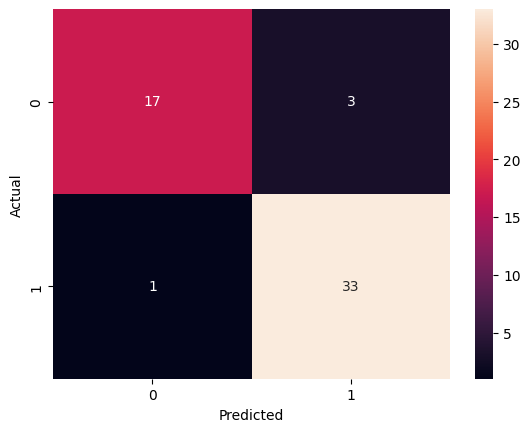

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# 2eme, entrainement sans gyro, nos données, sans seuil

In [8]:
import os
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Function to extract features from accelerometer data only
def extract_features(data):
    accel = np.array([entry['accel'] for entry in data])
    
    # Simple feature extraction (mean, std, min, max for accel)
    features = []
    features.append(np.mean(accel, axis=0))
    features.append(np.std(accel, axis=0))
    features.append(np.min(accel, axis=0))
    features.append(np.max(accel, axis=0))
    
    return np.concatenate(features)

# Load and process the dataset
def load_data(folder):
    X = []
    y = []
    
    for filename in os.listdir(folder):
        if filename.endswith('.json'):
            filepath = os.path.join(folder, filename)
            with open(filepath, 'r') as f:
                json_data = json.load(f)
                features = extract_features(json_data['data'])  # Only use accel data
                X.append(features)
                y.append(1 if json_data['iscrash'] else 0)
    
    return np.array(X), np.array(y)

# Path to the folder containing the JSON files
folder_path = './dataNous'

# Load data
X, y = load_data(folder_path)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize/scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a classifier (Random Forest in this case)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("RandomForestClassifier")
print(classification_report(y_test, y_pred))


RandomForestClassifier
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.91      0.94      0.93        34

    accuracy                           0.91        54
   macro avg       0.90      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



# 3eme, nos données, avec seuil, sans gyro

In [24]:
import os
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Function to extract features from accelerometer data only
def extract_features(data):
    # Only use the 'accel' data (exclude 'gyro')
    accel = np.array([entry['accel'] for entry in data])
    
    # Simple feature extraction (mean, std, min, max for accel)
    features = []
    features.append(np.mean(accel, axis=0))
    features.append(np.std(accel, axis=0))
    features.append(np.min(accel, axis=0))
    features.append(np.max(accel, axis=0))
    
    return np.concatenate(features)

# Load and process the dataset
def load_data(folder):
    X = []
    y = []
    
    for filename in os.listdir(folder):
        if filename.endswith('.json'):
            filepath = os.path.join(folder, filename)
            with open(filepath, 'r') as f:
                json_data = json.load(f)
                features = extract_features(json_data['data'])  # Only use accel data
                X.append(features)
                y.append(1 if json_data['iscrash'] else 0)
    
    return np.array(X), np.array(y)

# Path to the folder containing the JSON files
folder_path = './dataNous'

# Load data
X, y = load_data(folder_path)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize/scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a classifier (Random Forest in this case)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get prediction probabilities (since we need scores to apply thresholds)
y_prob = clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (iscrash = 1)

# Function to predict with a threshold
def predic_with_threshold(probs, threshold):
    return np.array(probs > threshold, dtype=int)

# List of thresholds to test
thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]  # Thresholds between 0 and 1 since we're dealing with probabilities

# Loop through each threshold and print the classification report
for threshold in thresholds:
    y_pred_threshold = predic_with_threshold(y_prob, threshold)
    print(f"Threshold: {threshold}")
    print(classification_report(y_test, y_pred_threshold))
    print("\n")

# Evaluate the default RandomForestClassifier (using the default threshold of 0.5)
y_pred_default = clf.predict(X_test)

print("RandomForestClassifier (Default Threshold)")
print(classification_report(y_test, y_pred_default))


Threshold: 0.5
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.91      0.94      0.93        34

    accuracy                           0.91        54
   macro avg       0.90      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



Threshold: 0.6
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.94      0.94      0.94        34

    accuracy                           0.93        54
   macro avg       0.92      0.92      0.92        54
weighted avg       0.93      0.93      0.93        54



Threshold: 0.7
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       0.97      0.94      0.96        34

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95  

# 4eme isolation forest 

Isolation Forest Outlier Detection - Performance:
              precision    recall  f1-score   support

           0       0.43      1.00      0.60        69
           1       1.00      0.16      0.28       111

    accuracy                           0.48       180
   macro avg       0.71      0.58      0.44       180
weighted avg       0.78      0.48      0.40       180

Number of true outliers (crashes) in the dataset: 111
Number of predicted outliers by the model: 18


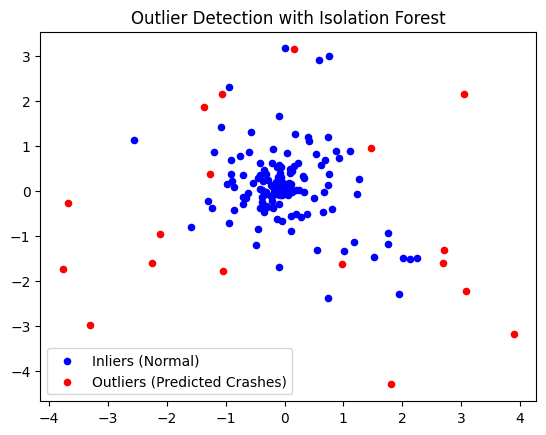

In [10]:
import os
import json
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Function to extract features from accelerometer data only
def extract_features(data):
    accel = np.array([entry['accel'] for entry in data])
    
    # Simple feature extraction (mean, std, min, max for accel)
    features = []
    features.append(np.mean(accel, axis=0))
    features.append(np.std(accel, axis=0))
    features.append(np.min(accel, axis=0))
    features.append(np.max(accel, axis=0))
    
    return np.concatenate(features)

# Load and process the dataset
def load_data(folder):
    X = []
    y = []  # Ground truth (iscrash values)
    
    for filename in os.listdir(folder):
        if filename.endswith('.json'):
            filepath = os.path.join(folder, filename)
            with open(filepath, 'r') as f:
                json_data = json.load(f)
                features = extract_features(json_data['data'])  # Only use accel data
                X.append(features)
                y.append(1 if json_data['iscrash'] else 0)  # iscrash: 1 if crash, else 0
    
    return np.array(X), np.array(y)

# Path to the folder containing the JSON files
folder_path = './dataNous'

# Load data
X, y_true = load_data(folder_path)  # y_true is the ground truth for iscrash

# Normalize/scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)

# Train the model to detect outliers
y_pred_outliers = iso_forest.fit_predict(X_scaled)

# Convert the model's output (-1 for outliers, 1 for inliers) to match the binary ground truth format
y_pred = np.where(y_pred_outliers == -1, 1, 0)  # 1 for outliers (crashes), 0 for inliers

# Display classification report comparing model predictions with true iscrash values
print("Isolation Forest Outlier Detection - Performance:")
print(classification_report(y_true, y_pred))

# Count the number of true outliers (crashes) in the dataset
num_true_outliers = np.sum(y_true)
num_predicted_outliers = np.sum(y_pred)

print(f"Number of true outliers (crashes) in the dataset: {num_true_outliers}")
print(f"Number of predicted outliers by the model: {num_predicted_outliers}")

# Plotting the results to visualize outliers
outliers = np.where(y_pred == 1)
inliers = np.where(y_pred == 0)

plt.scatter(X_scaled[inliers, 0], X_scaled[inliers, 1], label='Inliers (Normal)', c='blue', s=20)
plt.scatter(X_scaled[outliers, 0], X_scaled[outliers, 1], label='Outliers (Predicted Crashes)', c='red', s=20)
plt.title("Outlier Detection with Isolation Forest")
plt.legend()
plt.show()


# 5eme Local Outlier Factor (LOF)

Local Outlier Factor Outlier Detection - Performance:
              precision    recall  f1-score   support

           0       0.43      1.00      0.60        69
           1       1.00      0.16      0.28       111

    accuracy                           0.48       180
   macro avg       0.71      0.58      0.44       180
weighted avg       0.78      0.48      0.40       180

Number of true outliers (crashes) in the dataset: 111
Number of predicted outliers by the model: 18


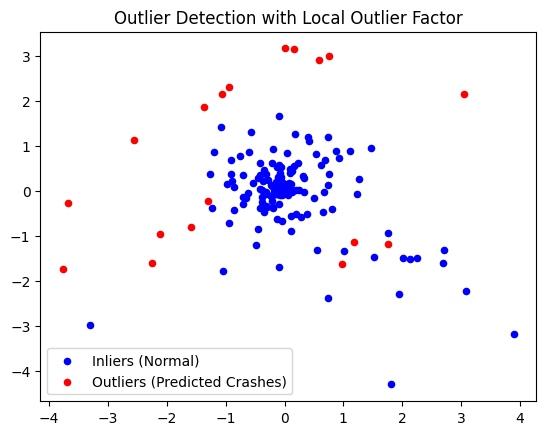

In [11]:
import os
import json
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Function to extract features from accelerometer data only
def extract_features(data):
    accel = np.array([entry['accel'] for entry in data])
    
    # Simple feature extraction (mean, std, min, max for accel)
    features = []
    features.append(np.mean(accel, axis=0))
    features.append(np.std(accel, axis=0))
    features.append(np.min(accel, axis=0))
    features.append(np.max(accel, axis=0))
    
    return np.concatenate(features)

# Load and process the dataset
def load_data(folder):
    X = []
    y = []  # Ground truth (iscrash values)
    
    for filename in os.listdir(folder):
        if filename.endswith('.json'):
            filepath = os.path.join(folder, filename)
            with open(filepath, 'r') as f:
                json_data = json.load(f)
                features = extract_features(json_data['data'])  # Only use accel data
                X.append(features)
                y.append(1 if json_data['iscrash'] else 0)  # iscrash: 1 if crash, else 0
    
    return np.array(X), np.array(y)

# Path to the folder containing the JSON files
folder_path = './dataNous'

# Load data
X, y_true = load_data(folder_path)  # y_true is the ground truth for iscrash

# Normalize/scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the Local Outlier Factor model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# Fit the model and predict outliers
y_pred = lof.fit_predict(X_scaled)

# Convert the model's output (-1 for outliers, 1 for inliers) to match the binary ground truth format
y_pred_binary = np.where(y_pred == -1, 1, 0)  # 1 for outliers (crashes), 0 for inliers

# Display classification report comparing model predictions with true iscrash values
print("Local Outlier Factor Outlier Detection - Performance:")
print(classification_report(y_true, y_pred_binary))

# Count the number of true outliers (crashes) in the dataset
num_true_outliers = np.sum(y_true)
num_predicted_outliers = np.sum(y_pred_binary)

print(f"Number of true outliers (crashes) in the dataset: {num_true_outliers}")
print(f"Number of predicted outliers by the model: {num_predicted_outliers}")

# Plotting the results to visualize outliers
outliers = np.where(y_pred_binary == 1)
inliers = np.where(y_pred_binary == 0)

plt.scatter(X_scaled[inliers, 0], X_scaled[inliers, 1], label='Inliers (Normal)', c='blue', s=20)
plt.scatter(X_scaled[outliers, 0], X_scaled[outliers, 1], label='Outliers (Predicted Crashes)', c='red', s=20)
plt.title("Outlier Detection with Local Outlier Factor")
plt.legend()
plt.show()


# 6eme LOF avec seuil

Local Outlier Factor Outlier Detection with Threshold - Performance:
              precision    recall  f1-score   support

           0       0.95      0.29      0.44        69
           1       0.69      0.99      0.81       111

    accuracy                           0.72       180
   macro avg       0.82      0.64      0.63       180
weighted avg       0.79      0.72      0.67       180

Number of true outliers (crashes) in the dataset: 111
Number of predicted outliers by the model: 159


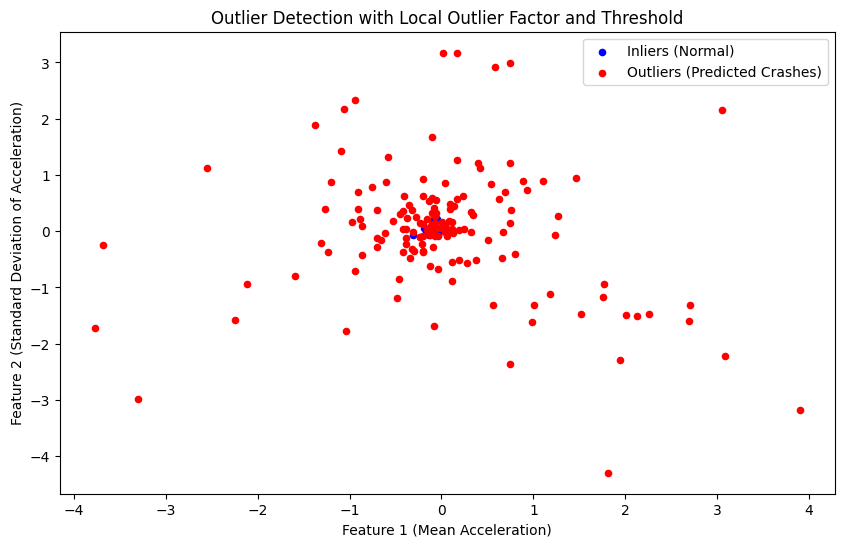

In [12]:
import os
import json
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Function to extract features from accelerometer data only
def extract_features(data):
    # Only use the 'accel' data (exclude 'gyro')
    accel = np.array([entry['accel'] for entry in data])
    
    # Simple feature extraction (mean, std, min, max for accel)
    features = []
    features.append(np.mean(accel, axis=0))
    features.append(np.std(accel, axis=0))
    features.append(np.min(accel, axis=0))
    features.append(np.max(accel, axis=0))
    
    return np.concatenate(features)

# Load and process the dataset
def load_data(folder):
    X = []
    y = []
    
    for filename in os.listdir(folder):
        if filename.endswith('.json'):
            filepath = os.path.join(folder, filename)
            with open(filepath, 'r') as f:
                json_data = json.load(f)
                features = extract_features(json_data['data'])  # Only use accel data
                X.append(features)
                y.append(1 if json_data['iscrash'] else 0)
    
    return np.array(X), np.array(y)

# Path to the folder containing the JSON files
folder_path = './dataNous'

# Load data
X, y_true = load_data(folder_path)

# Normalize/scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the Local Outlier Factor model
lof = LocalOutlierFactor(n_neighbors=20, novelty=False)

# Fit the model and predict outliers
y_pred_outliers = lof.fit_predict(X_scaled)

# Get the negative outlier factor scores (lower score = more anomalous)
negative_outlier_factor = lof.negative_outlier_factor_

# Apply the threshold to classify as crash or not
threshold = -1.0  # Set threshold value (modify this based on your analysis)
y_pred = np.where(negative_outlier_factor < threshold, 1, 0)  # 1 for outliers (crashes), 0 for inliers

# Display classification report comparing model predictions with true iscrash values
print("Local Outlier Factor Outlier Detection with Threshold - Performance:")
print(classification_report(y_true, y_pred))

# Count the number of true outliers (crashes) in the dataset
num_true_outliers = np.sum(y_true)
num_predicted_outliers = np.sum(y_pred)

print(f"Number of true outliers (crashes) in the dataset: {num_true_outliers}")
print(f"Number of predicted outliers by the model: {num_predicted_outliers}")

# Optional: Plotting the results to visualize outliers
outliers = np.where(y_pred == 1)
inliers = np.where(y_pred == 0)

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[inliers, 0], X_scaled[inliers, 1], label='Inliers (Normal)', c='blue', s=20)
plt.scatter(X_scaled[outliers, 0], X_scaled[outliers, 1], label='Outliers (Predicted Crashes)', c='red', s=20)
plt.title("Outlier Detection with Local Outlier Factor and Threshold")
plt.xlabel("Feature 1 (Mean Acceleration)")
plt.ylabel("Feature 2 (Standard Deviation of Acceleration)")
plt.legend()
plt.show()


# Avoir nos données et données munich hamosnisées pour le modèle 


Récup les données de munich

In [31]:
import pandas as pd

# Charger le fichier CSV (modifiez 'path_to_file.csv' avec votre propre chemin de fichier)
file_path = 'dataMunich/ACCData/device3-2024-09-14T18_29_05.csv'
df = pd.read_csv(file_path)

# Retirer la colonne "received_at"
df = df.drop(columns=['received_at','cloud_event_id'])

# Simplifier les noms des colonnes commençant par "MESSAGES"
df.columns = [
    col.split('.')[-1].replace('ACC_', '') if 'MESSAGES' in col else col
    for col in df.columns
]
# Afficher les nouvelles colonnes et quelques lignes pour vérifier
# print(df.columns)
print(df.head())


                         time  X (m/s²)  Y (m/s²)  Z (m/s²)
0  2024-09-14 18:29:05.546266 -0.627626 -6.903882  7.531507
1  2024-09-14 18:29:05.548760  1.255251 -6.903882  6.903882
2  2024-09-14 18:29:05.551254  2.510502 -7.531507  7.531507
3  2024-09-14 18:29:05.553748  1.255251 -7.531507  6.903882
4  2024-09-14 18:29:05.556242 -1.255251 -6.903882  6.276256


les transformer pour avoir comme nos données

In [32]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Fonction pour extraire les caractéristiques des données de test
def extract_features_from_test(df):
    # Supposons que les colonnes pertinentes soient les colonnes d'accélération X, Y, Z
    accel = df[['X (m/s²)', 'Y (m/s²)', 'Z (m/s²)']].values  # Utilise les noms des colonnes après modification

    # Extraire les caractéristiques (moyenne, std, min, max) pour l'accéléromètre
    features = []
    features.append(np.mean(accel, axis=0))
    features.append(np.std(accel, axis=0))
    features.append(np.min(accel, axis=0))
    features.append(np.max(accel, axis=0))
    
    return np.concatenate(features)


# Extraire les caractéristiques des données de test
X_test_new = extract_features_from_test(df)

# Normaliser/scaler les nouvelles données de test avec le scaler entraîné
X_test_new_scaled = scaler.transform([X_test_new])

# Maintenant, X_test_new_scaled peut être utilisé pour tester ton modèle


In [33]:
# Prédire la probabilité pour la classe 'iscrash' (1)
y_prob_new = clf.predict_proba(X_test_new_scaled)[:, 1]

# Prédire avec le seuil de 0.7
threshold = 0.7
y_pred_new = predic_with_threshold(y_prob_new, threshold)

# Afficher la prédiction
if y_pred_new[0] == 1:
    print("Prediction: Crash détecté")
else:
    print("Prediction: Pas de crash")


Prediction: Crash détecté


In [34]:
import random

# Sélectionner une donnée d'entraînement au hasard
random_index = random.randint(0, len(X_train) - 1)  # Indice aléatoire dans X_train
X_train_sample = X_train[random_index].reshape(1, -1)  # Reshape pour qu'il soit compatible avec la fonction predict_proba
y_train_actual = y_train[random_index]  # La vraie étiquette associée à cette donnée

# Prédire la probabilité pour la classe 'iscrash' (1) sur cette donnée d'entraînement
y_prob_train_sample = clf.predict_proba(X_train_sample)[:, 1]

# Prédire avec le seuil de 0.7
threshold = 0.7
y_pred_train_sample = predic_with_threshold(y_prob_train_sample, threshold)

# Afficher la prédiction et la vraie étiquette
print(f"Vraie étiquette: {'Crash' if y_train_actual == 1 else 'Pas de crash'}")
if y_pred_train_sample[0] == 1:
    print("Prédiction: Crash détecté")
else:
    print("Prédiction: Pas de crash")


Vraie étiquette: Pas de crash
Prédiction: Pas de crash
